# Predicting IMDB Scores

Project by Remi Ojo Jr.

Data Set from : https://data.world/popculture/imdb-5000-movie-dataset

For this data project, we will be looking at predicting IMDB scores based on the dataset that we have with multiple variables such as movie duration, number of facebook likes, and cast likes.

Data Cleaning

- Breakup movie genres into multiple columns (text to colum with delimiter)
- Breakup plot keywords into multiple columns (text to column with delimiter)
- Remove end symbols from Movie titles (via trim in excel)
- Create Gross to Budget Ratio column
- Reorder columns
- Remove IMDB web address
- Remove records where some rows have null values

---

In [2]:
import pandas as pd
import numpy as np
from scipy import stats
from scipy import stats, special
from sklearn import model_selection, metrics, linear_model, datasets, feature_selection
from seaborn import pairplot, heatmap
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LogisticRegression

import seaborn as sns
import statsmodels.formula.api as smf  
import statsmodels.multivariate as smm

import matplotlib.pyplot as plt
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [5]:
movie_n = pd.read_csv("moviedata_numbers2.csv")
movie_w = pd.read_csv("moviedata_words.csv")

movie_n.mean()
movie_w.head(5)
movie_n.head(5)

item = movie_n.fillna(movie_n.mean())
item = item[0:3810]
item.head()

,Year,Duration,Director Likes,num_voted_users,Cast Facebook Likes,Poster Faces,User Review Volume,Gross,Budget,GB Ratio,IMDB Score,Aspect Ratio,Facebook Likes
0,2009,178,0,886204,4834,0,3054,760505847,237000000,3.21,7.9,1.78,33000.000000
1,2007,169,563,471220,48350,0,1238,309404152,300000000,1.03,7.1,2.35,93241.994751
2,2015,148,0,275868,11700,1,994,200074175,245000000,0.82,6.8,2.35,85000.000000
3,2012,164,22000,1144337,106759,0,2701,448130642,250000000,1.79,8.5,2.35,93241.994751
4,2012,132,475,212204,1873,1,738,73058679,263700000,0.28,6.6,2.35,24000.000000


In [6]:
item.describe()

,Year,Duration,Director Likes,num_voted_users,Cast Facebook Likes,Poster Faces,User Review Volume,Gross,Budget,GB Ratio,IMDB Score,Aspect Ratio,Facebook Likes
count,3810.000000,3810.000000,3810.000000,3.810000e+03,3810.000000,3810.000000,3810.000000,3.810000e+03,3.810000e+03,3810.000000,3810.000000,3810.000000,3810.000000
mean,2002.980315,110.159055,796.996588,1.044714e+05,11391.564304,1.377165,333.052756,5.190949e+07,4.579425e+07,6.352575,6.467165,2.109504,93241.994751
std,10.011172,22.711123,3047.626801,1.513924e+05,19030.319331,2.051772,409.747853,7.007490e+07,2.244703e+08,130.990872,1.057263,0.352561,153213.917277
min,1920.000000,37.000000,0.000000,5.000000e+00,0.000000,0.000000,1.000000,1.620000e+02,2.180000e+02,0.000000,1.600000,1.180000,0.000000
25%,1999.000000,96.000000,10.000000,1.873575e+04,1858.500000,0.000000,107.000000,7.563752e+06,1.000000e+07,0.470000,5.900000,1.850000,2000.000000
50%,2005.000000,106.000000,62.000000,5.293300e+04,3962.500000,1.000000,207.500000,2.909214e+07,2.500000e+07,1.080000,6.600000,2.350000,93241.994751
75%,2010.000000,120.000000,234.000000,1.268562e+05,16124.000000,2.000000,395.750000,6.643827e+07,5.000000e+07,2.240000,7.200000,2.350000,93241.994751
max,2016.000000,330.000000,23000.000000,1.689764e+06,656730.000000,43.000000,5060.000000,7.605058e+08,1.221550e+10,7194.490000,9.300000,16.000000,997000.000000


At this point, I have broken down my data set:
- one that has all the numbers
- one that has all the words with the IMDB score

Might try and model two different methods and see what we get

In [7]:
item.corr()


,Year,Duration,Director Likes,num_voted_users,Cast Facebook Likes,Poster Faces,User Review Volume,Gross,Budget,GB Ratio,IMDB Score,Aspect Ratio,Facebook Likes
Year,1.000000,-0.128034,-0.043830,0.022340,0.124177,0.068448,0.018139,0.051545,0.046298,-0.016854,-0.130411,0.222816,-0.052692
Duration,-0.128034,1.000000,0.179861,0.338643,0.122057,0.030043,0.351027,0.245657,0.068182,-0.033177,0.364300,0.154697,-0.061913
Director Likes,-0.043830,0.179861,1.000000,0.300773,0.120002,-0.047400,0.218513,0.140148,0.018613,-0.006483,0.190391,0.038332,-0.034719
num_voted_users,0.022340,0.338643,0.300773,1.000000,0.252438,-0.031521,0.780067,0.627241,0.066939,0.010161,0.476801,0.086399,-0.129739
Cast Facebook Likes,0.124177,0.122057,0.120002,0.252438,1.000000,0.081344,0.182867,0.239154,0.029536,-0.019013,0.105448,0.070754,-0.061752
Poster Faces,0.068448,0.030043,-0.047400,-0.031521,0.081344,1.000000,-0.078978,-0.031768,-0.021690,-0.013690,-0.065307,0.017088,0.010164
User Review Volume,0.018139,0.351027,0.218513,0.780067,0.182867,-0.078978,1.000000,0.547395,0.071384,0.068539,0.321616,0.099705,-0.118819
Gross,0.051545,0.245657,0.140148,0.627241,0.239154,-0.031768,0.547395,1.000000,0.100484,0.018151,0.211475,0.065855,-0.105486
Budget,0.046298,0.068182,0.018613,0.066939,0.029536,-0.021690,0.071384,0.100484,1.000000,-0.008131,0.029075,0.025989,-0.002930
GB Ratio,-0.016854,-0.033177,-0.006483,0.010161,-0.019013,-0.013690,0.068539,0.018151,-0.008131,1.000000,0.010268,-0.041655,0.014415


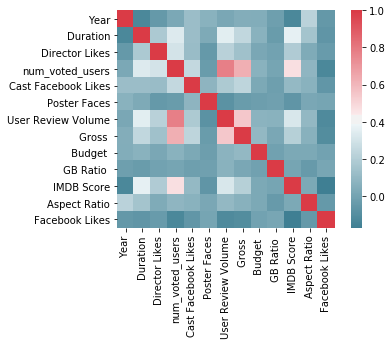

In [8]:
sns.heatmap(item.corr(), mask=np.zeros_like(item.corr(), dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True), square=True)



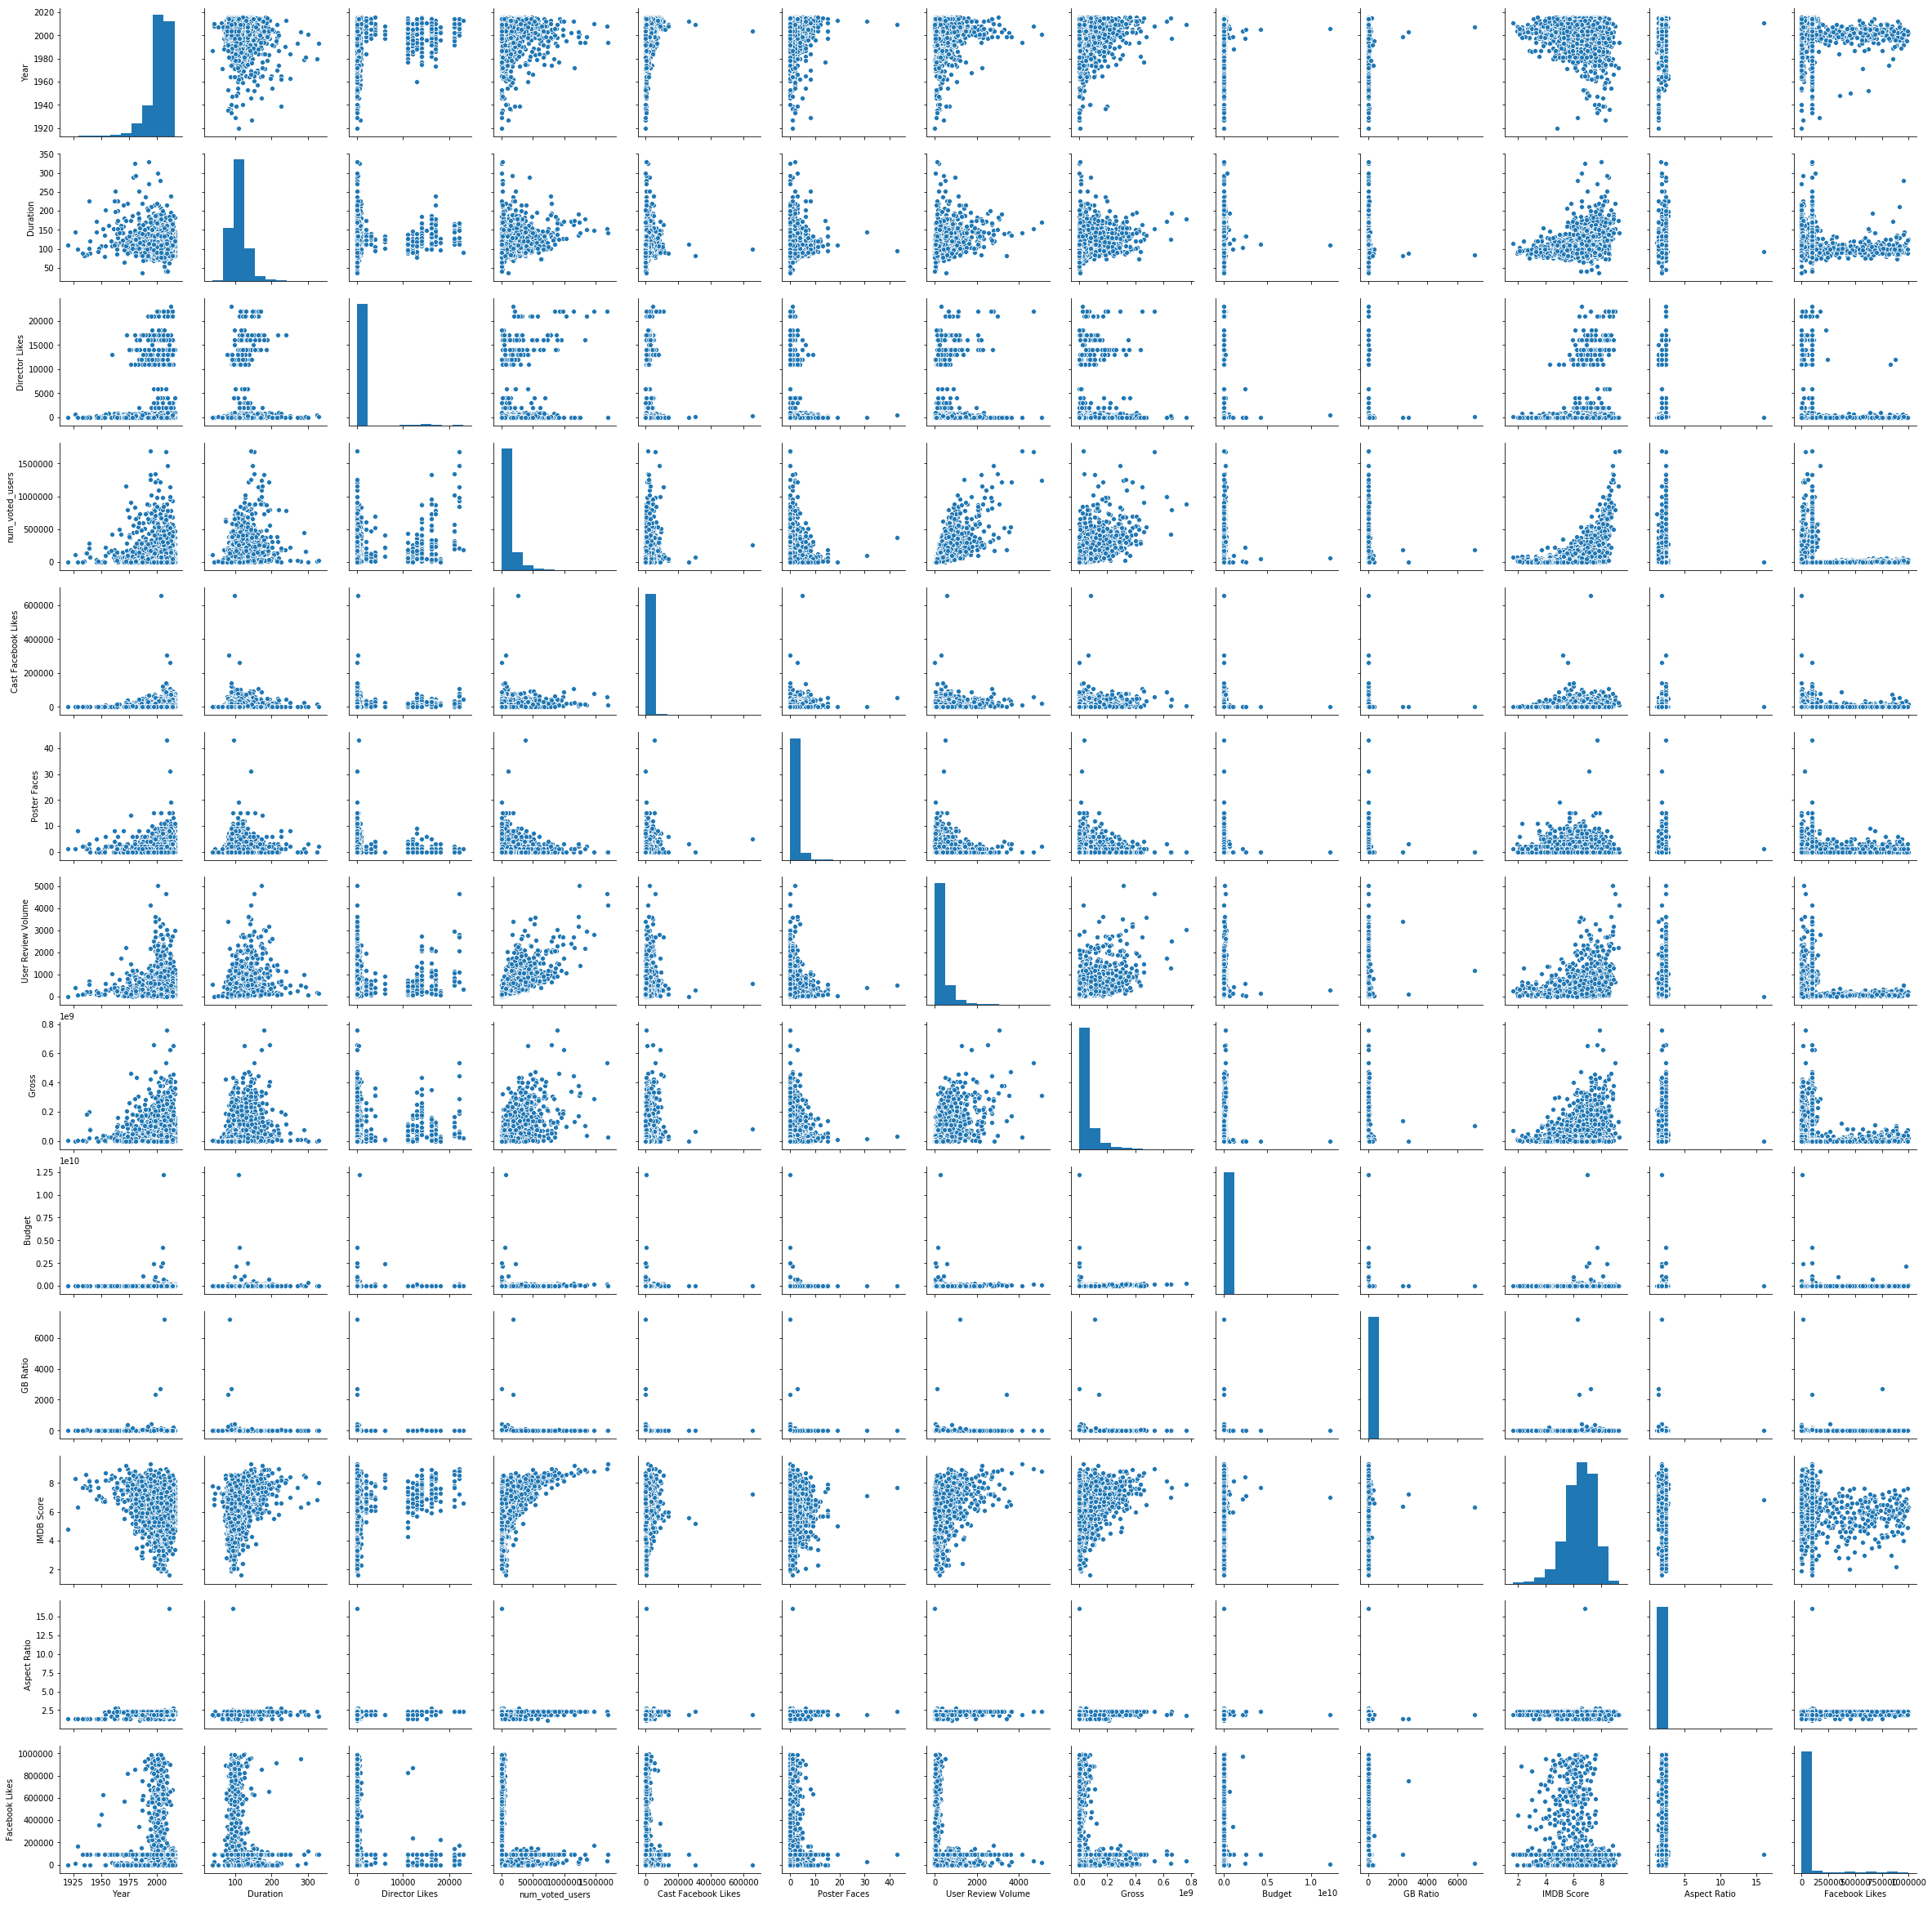

In [9]:
sns.pairplot(item)

In [13]:
type(item)

pandas.core.frame.DataFrame

In [14]:
df_gooder = pd.DataFrame()
for c in item.columns:
    fixed_c = c.strip().lower().replace(' ' , '_')
    print(f'{c} > {fixed_c}')
    df_gooder[fixed_c] = item[c]
    
df_gooder.head()

Year > year
Duration > duration
Director Likes > director_likes
num_voted_users > num_voted_users
Cast Facebook Likes > cast_facebook_likes
Poster Faces > poster_faces
User Review Volume > user_review_volume
 Gross  > gross
 Budget  > budget
 GB Ratio  > gb_ratio
IMDB Score > imdb_score
Aspect Ratio > aspect_ratio
Facebook Likes > facebook_likes


,year,duration,director_likes,num_voted_users,cast_facebook_likes,poster_faces,user_review_volume,gross,budget,gb_ratio,imdb_score,aspect_ratio,facebook_likes
0,2009,178,0,886204,4834,0,3054,760505847,237000000,3.21,7.9,1.78,33000.000000
1,2007,169,563,471220,48350,0,1238,309404152,300000000,1.03,7.1,2.35,93241.994751
2,2015,148,0,275868,11700,1,994,200074175,245000000,0.82,6.8,2.35,85000.000000
3,2012,164,22000,1144337,106759,0,2701,448130642,250000000,1.79,8.5,2.35,93241.994751
4,2012,132,475,212204,1873,1,738,73058679,263700000,0.28,6.6,2.35,24000.000000


In [15]:
df_gooder.corr()

,year,duration,director_likes,num_voted_users,cast_facebook_likes,poster_faces,user_review_volume,gross,budget,gb_ratio,imdb_score,aspect_ratio,facebook_likes
year,1.000000,-0.128034,-0.043830,0.022340,0.124177,0.068448,0.018139,0.051545,0.046298,-0.016854,-0.130411,0.222816,-0.052692
duration,-0.128034,1.000000,0.179861,0.338643,0.122057,0.030043,0.351027,0.245657,0.068182,-0.033177,0.364300,0.154697,-0.061913
director_likes,-0.043830,0.179861,1.000000,0.300773,0.120002,-0.047400,0.218513,0.140148,0.018613,-0.006483,0.190391,0.038332,-0.034719
num_voted_users,0.022340,0.338643,0.300773,1.000000,0.252438,-0.031521,0.780067,0.627241,0.066939,0.010161,0.476801,0.086399,-0.129739
cast_facebook_likes,0.124177,0.122057,0.120002,0.252438,1.000000,0.081344,0.182867,0.239154,0.029536,-0.019013,0.105448,0.070754,-0.061752
poster_faces,0.068448,0.030043,-0.047400,-0.031521,0.081344,1.000000,-0.078978,-0.031768,-0.021690,-0.013690,-0.065307,0.017088,0.010164
user_review_volume,0.018139,0.351027,0.218513,0.780067,0.182867,-0.078978,1.000000,0.547395,0.071384,0.068539,0.321616,0.099705,-0.118819
gross,0.051545,0.245657,0.140148,0.627241,0.239154,-0.031768,0.547395,1.000000,0.100484,0.018151,0.211475,0.065855,-0.105486
budget,0.046298,0.068182,0.018613,0.066939,0.029536,-0.021690,0.071384,0.100484,1.000000,-0.008131,0.029075,0.025989,-0.002930
gb_ratio,-0.016854,-0.033177,-0.006483,0.010161,-0.019013,-0.013690,0.068539,0.018151,-0.008131,1.000000,0.010268,-0.041655,0.014415


In [16]:
#iteration 1
#movie_reg = smf.ols("imdb_score ~ year + duration + director_likes+num_voted_users +np.power(num_voted_users,2) +poster_faces+user_review_volume + gross+budget+facebook_likes+gb_ratio", data=df_gooder).fit()
#movie_reg.summary()

#iteration 2
#movie_reg = smf.ols("imdb_score ~ year + duration + director_likes+num_voted_users+poster_faces+user_review_volume + gross+budget+facebook_likes+gb_ratio", data=df_gooder).fit()
#movie_reg.summary()


#iteration 3
movie_reg = smf.ols("imdb_score ~ year + duration + np.power(duration,3) + director_likes+num_voted_users +np.power(num_voted_users,2)+ poster_faces+user_review_volume + np.power(user_review_volume,2) + gross+budget+facebook_likes+gb_ratio", data=df_gooder).fit()
movie_reg.summary()

# There are sample iterations, In reality I played with the power on different elements to obtain the highest R-squared value
# Also looked and included and excluding different elements based on their correlation with the IMDB score


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             imdb_score   R-squared:                       0.372
Model:                            OLS   Adj. R-squared:                  0.369
Method:                 Least Squares   F-statistic:                     172.6
Date:                Mon, 25 Mar 2019   Prob (F-statistic):               0.00
Time:                        16:57:33   Log-Likelihood:                -4733.0
No. Observations:                3810   AIC:                             9494.
Df Residuals:                    3796   BIC:                             9581.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept                          30.3647      2.791     10.878      0.000      24.892      35.837
year                               -0.0129      0.001     -9.246      0.000      -0.016      -0.010
duration                            0.0172      0.001     12.921      0.000       0.015       0.020
np.power(duration, 3)           -1.031e-07   1.79e-08     -5.745      0.000   -1.38e-07   -6.79e-08
director_likes                   7.513e-06   4.74e-06      1.584      0.113   -1.78e-06    1.68e-05
num_voted_users                  7.955e-06   3.12e-07     25.537      0.000    7.34e-06    8.57e-06
np.power(num_voted_users, 2)    -4.202e-12   2.93e-13    -14.327      0.000   -4.78e-12   -3.63e-12
poster_faces                       -0.0363      0.007     -5.398      0.000      -0.049      -0.023
user_review_volume                 -0.0011      0.000    -10.480      0.000      -0.001      -0.001
np.power(user_review_volume, 2)  2.624e-07   3.69e-08      7.107      0.000     1.9e-07    3.35e-07
gross                           -3.212e-09   2.62e-10    -12.240      0.000   -3.73e-09    -2.7e-09
budget                          -4.939e-12   6.11e-11     -0.081      0.936   -1.25e-10    1.15e-10
facebook_likes                  -6.622e-07   9.05e-08     -7.317      0.000    -8.4e-07   -4.85e-07
gb_ratio                            0.0002      0.000      1.816      0.069   -1.51e-05       0.000
==============================================================================
Omnibus:                      511.708   Durbin-Watson:                   1.882
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1108.705
Skew:                          -0.804   Prob(JB):                    1.77e-241
Kurtosis:                       5.097   Cond. No.                     2.84e+13
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.84e+13. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [67]:
new_gooder = df_gooder[['year','duration','director_likes','num_voted_users','poster_faces','user_review_volume','gross','budget','facebook_likes','gb_ratio']]
new_gooder.head()

,year,duration,director_likes,num_voted_users,poster_faces,user_review_volume,gross,budget,facebook_likes,gb_ratio
0,2009,178,0,886204,0,3054,760505847,237000000,33000.000000,3.21
1,2007,169,563,471220,0,1238,309404152,300000000,93241.994751,1.03
2,2015,148,0,275868,1,994,200074175,245000000,85000.000000,0.82
3,2012,164,22000,1144337,0,2701,448130642,250000000,93241.994751,1.79
4,2012,132,475,212204,1,738,73058679,263700000,24000.000000,0.28


In [73]:
df = pd.DataFrame(new_gooder)
y = df_gooder['imdb_score'].values 


X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.25, random_state=0)
print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)



(2857, 10) (2857,)
(953, 10) (953,)


In [82]:
dims = ['year','duration','director_likes','num_voted_users','poster_faces','user_review_volume','gross','budget','facebook_likes','gb_ratio']

ds = {dim:df_gooder.sort_values(dim)[dims] for dim in dims}
ys = {dim:df_gooder.sort_values(dim)['imdb_score'] for dim in dims}


In [77]:

lm = linear_model.LinearRegression()
model = lm.fit(X_train, y_train)
predictions = lm.predict(X_test)

predictions[0:5]

array([6.77114418, 6.33710611, 6.59916309, 6.80472258, 5.85389289])

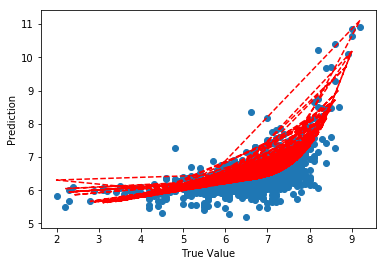

In [20]:
plt.scatter(y_test, predictions)
plt.xlabel('True Value')
plt.ylabel('Prediction')

z = np.polyfit(y_test, predictions, 4)
p = np.poly1d(z)
plt.plot(y_test,p(y_test),"r--")

plt.show()


In [21]:
print (model.score(X_test, y_test))
# We can see that the overall score can be affected by the train/test split
# 0.25 Split seems to be the sweet spot

0.33542912106761524


We have a correlation score of 0.32758.
Note: Using the ffill method to address with NaN values in the Facebook Likes has an effect on the fit
Not the closest to the being able to accurately prediot the IMDB score with the data at hand.
Future considerations include:
OneHotEncoding the categorical values (ie. Specific Actors)

In [83]:
new_model = smf.OLS(ys[dims[0]],ds[dims[0]]).fit()
new_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             imdb_score   R-squared:                       0.982
Model:                            OLS   Adj. R-squared:                  0.982
Method:                 Least Squares   F-statistic:                 2.085e+04
Date:                Mon, 25 Mar 2019   Prob (F-statistic):               0.00
Time:                        17:46:57   Log-Likelihood:                -4904.8
No. Observations:                3810   AIC:                             9830.
Df Residuals:                    3800   BIC:                             9892.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
year                   0.0025   3.66e-05     69.404      0.000       0.002       0.003
duration               0.0121      0.001     17.917      0.000       0.011       0.013
director_likes      6.049e-06   4.93e-06      1.226      0.220   -3.62e-06    1.57e-05
num_voted_users     4.199e-06   1.68e-07     25.040      0.000    3.87e-06    4.53e-06
poster_faces          -0.0372      0.007     -5.330      0.000      -0.051      -0.024
user_review_volume    -0.0005   5.71e-05     -8.265      0.000      -0.001      -0.000
gross              -2.218e-09   2.64e-10     -8.403      0.000   -2.74e-09    -1.7e-09
budget             -1.918e-11   6.38e-11     -0.301      0.764   -1.44e-10    1.06e-10
facebook_likes     -7.748e-07   9.37e-08     -8.268      0.000   -9.59e-07   -5.91e-07
gb_ratio               0.0002      0.000      2.152      0.031    2.09e-05       0.000
==============================================================================
Omnibus:                      551.231   Durbin-Watson:                   1.978
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1084.683
Skew:                          -0.893   Prob(JB):                    2.91e-236
Kurtosis:                       4.909   Cond. No.                     1.13e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.13e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

year
duration
director_likes
num_voted_users
poster_faces
user_review_volume
gross
budget
facebook_likes
gb_ratio


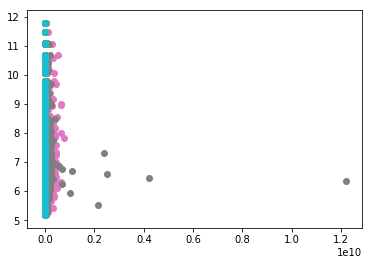

In [89]:
new_predictions = new_model.predict(ds[dims[0]])

for dim in dims:
    print(dim)
    y0 = new_model.predict(ds[dim])
    x0 = ds[dim][dim]
    plt.scatter(x0,y0)

In [56]:
X_train, X_test, y_train, y_test = train_test_split(dx, y, test_size=0.25, random_state=0)
print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)



(2857, 9) (2857,)
(953, 9) (953,)


In [57]:
from statsmodels.sandbox.regression.predstd import wls_prediction_std

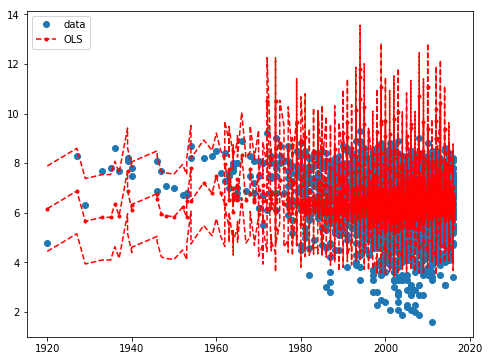

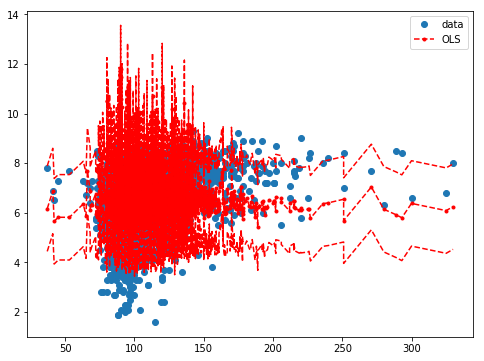

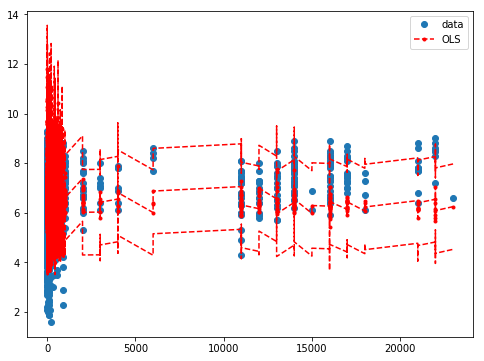

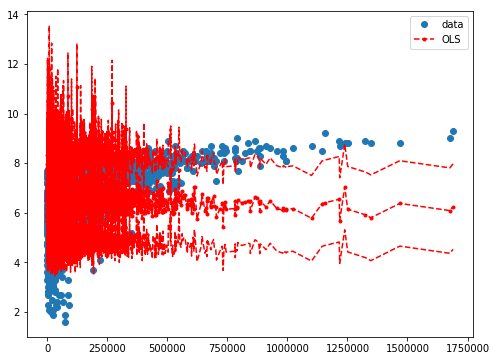

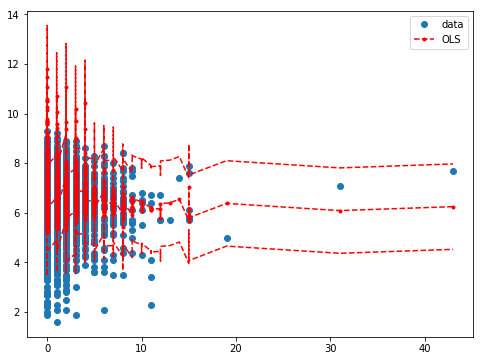

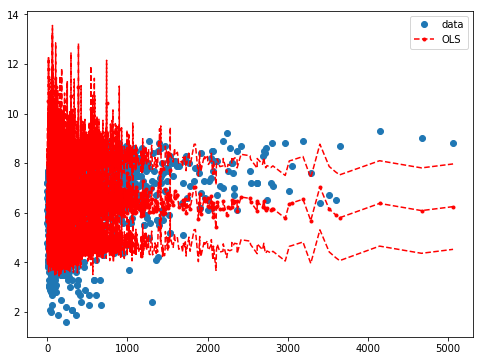

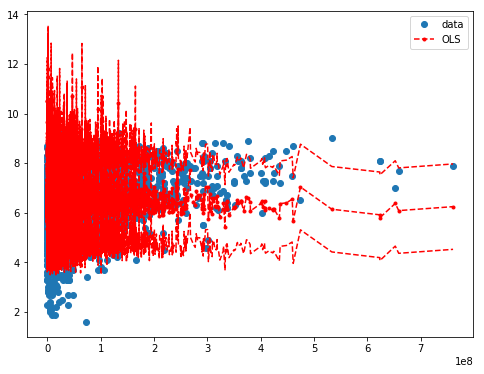

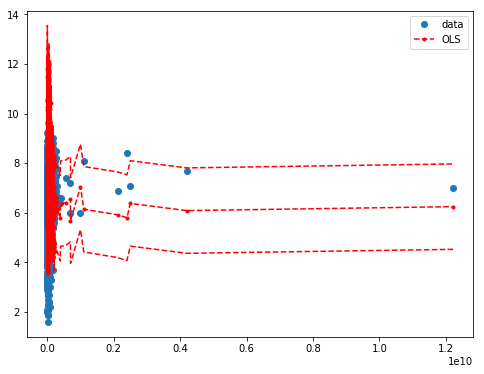

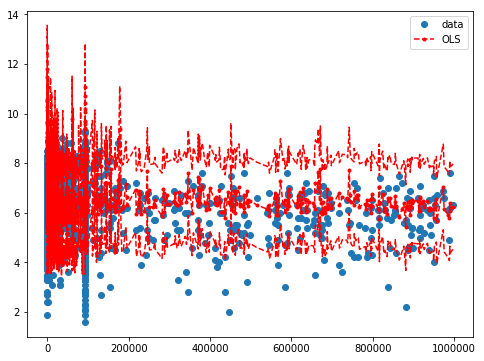

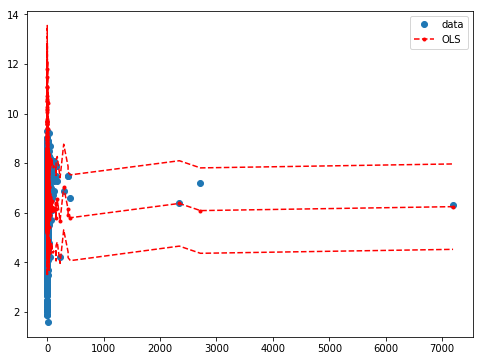

In [90]:
for dim in dims:

    g = ds[dim][dim]
    prstd, iv_l, iv_u = wls_prediction_std(new_model)

    fig, ax = plt.subplots(figsize=(8,6))

    ax.plot(g, ys[dim], 'o', label="data")
    ax.plot(g, new_model.fittedvalues, 'r--.', label="OLS")
    ax.plot(g, iv_u, 'r--')
    ax.plot(g, iv_l, 'r--')
    ax.legend(loc='best');

In [59]:
#Line of best fit against the predicted values
# What we have learned, is that poster faces and year are the dominating factors